In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras 

In [121]:
train_data = pd.read_csv("../data_sets/taitanic/train.csv")
test_data  = pd.read_csv("../data_sets/taitanic/test.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [123]:
plt.style.available
plt.style.use('seaborn-v0_8-dark')

In [124]:
features = ['Pclass','Sex','SibSp','Parch']

x_train = pd.get_dummies(train_data.loc[:,features])
x_test = pd.get_dummies(test_data.loc[:,features])

In [125]:
y_train = train_data.Survived
y_test = pd.read_csv('../data_sets/taitanic/gender_submission.csv',usecols=[1])

In [126]:
y_test = y_test.iloc[:,0]

In [127]:
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
x_test = np.array(x_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [128]:
my_module = keras.models.Sequential(
    [
    keras.layers.Input(shape=5),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
    ]
)

In [129]:
my_module.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [142]:
history = my_module.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test,y_test),
    epochs=200,
    batch_size=5,
    verbose=1,
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=10,
            restore_best_weights=True
        )
    ]
    )


Epoch 1/200
179/179 [==============================] - 1s 3ms/step - loss: 0.4704 - accuracy: 0.7924 - val_loss: 0.3859 - val_accuracy: 0.9904
Epoch 2/200
179/179 [==============================] - 1s 3ms/step - loss: 0.4620 - accuracy: 0.7991 - val_loss: 0.2385 - val_accuracy: 0.9354
Epoch 3/200
179/179 [==============================] - 1s 3ms/step - loss: 0.4486 - accuracy: 0.7946 - val_loss: 0.2979 - val_accuracy: 0.9258
Epoch 4/200
179/179 [==============================] - 1s 3ms/step - loss: 0.4410 - accuracy: 0.8058 - val_loss: 0.2295 - val_accuracy: 0.9833
Epoch 5/200
179/179 [==============================] - 1s 3ms/step - loss: 0.4536 - accuracy: 0.7935 - val_loss: 0.2541 - val_accuracy: 0.9833
Epoch 6/200
179/179 [==============================] - 1s 3ms/step - loss: 0.4428 - accuracy: 0.8047 - val_loss: 0.2913 - val_accuracy: 0.9856
Epoch 7/200
179/179 [==============================] - 1s 3ms/step - loss: 0.4402 - accuracy: 0.8025 - val_loss: 0.2189 - val_accuracy: 0.9761

# 👆 32 epoch is prefect here

In [143]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.470403,0.792368,0.385880,0.990431
1,0.461968,0.799102,0.238475,0.935407
2,0.448616,0.794613,0.297851,0.925837
3,0.441032,0.805836,0.229530,0.983254
4,0.453555,0.793490,0.254131,0.983254
5,0.442805,0.804714,0.291267,0.985646
6,0.440174,0.802469,0.218900,0.976077
7,0.443308,0.803591,0.300843,0.966507
8,0.444092,0.804714,0.263529,0.988038
9,0.443976,0.796857,0.269452,0.983254


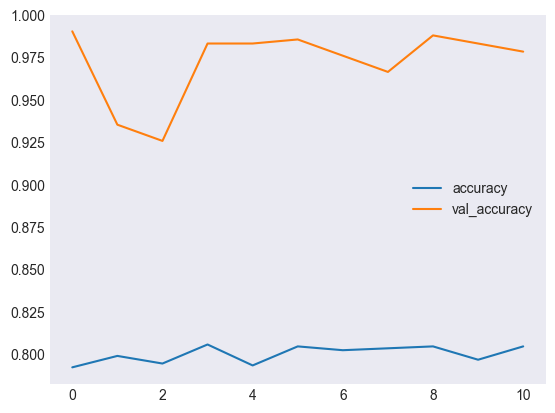

In [144]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

In [145]:
my_module.save('NN_BC_model.model')

INFO:tensorflow:Assets written to: NN_BC_model.model\assets


INFO:tensorflow:Assets written to: NN_BC_model.model\assets


In [146]:
my_loaded_model = keras.models.load_model('NN_BC_model.model')

In [147]:
my_loaded_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 512)               3072      
                                                                 
 dense_43 (Dense)            (None, 128)               65664     
                                                                 
 dense_44 (Dense)            (None, 64)                8256      
                                                                 
 dense_45 (Dense)            (None, 32)                2080      
                                                                 
 dense_46 (Dense)            (None, 16)                528       
                                                                 
 dense_47 (Dense)            (None, 1)                 17        
                                                                 
Total params: 79617 (311.00 KB)
Trainable params: 7961

In [148]:
y_pred = my_loaded_model.predict(x_test)

14/14 [==============================] - 0s 2ms/step


In [150]:
import numpy as np
y_pred = np.round(y_pred)

In [151]:
my_loaded_model.evaluate(x_test,y_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.9904


[0.38587984442710876, 0.9904305934906006]

In [152]:
from sklearn.metrics import confusion_matrix,classification_report
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)

In [155]:
print(CR)

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       266
         1.0       1.00      0.97      0.99       152

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418



<Axes: >

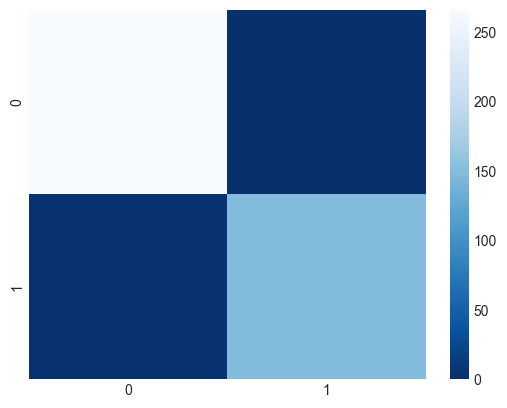

In [156]:
sns.heatmap(CM,cmap='Blues_r')